<a href="https://colab.research.google.com/github/pvdklei/modelsmakemodels/blob/master/pepijn/cifar10_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import torch
from torch import nn, optim
import torch.nn.functional as F
import matplotlib.pyplot as plt
import numpy as np
import visual_tools as vt
import importlib
import cv2
import torchvision 
import pandas as pd
from torchvision import datasets, transforms
import torchvision.transforms.functional as ftransforms
import utils

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


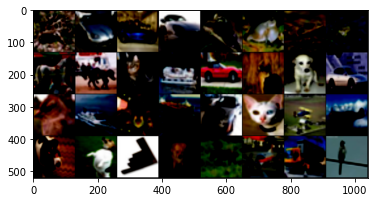

In [117]:
def showimage(image):
    image = image.numpy()
    image = image.transpose((1, 2, 0))
    plt.imshow(image)
images32 = torch.load("images32.tensor")
images1024 = torch.load("images1024.tensor")
labels1024 = torch.load("labels1024.tensor")
showimage(torchvision.utils.make_grid(images32))

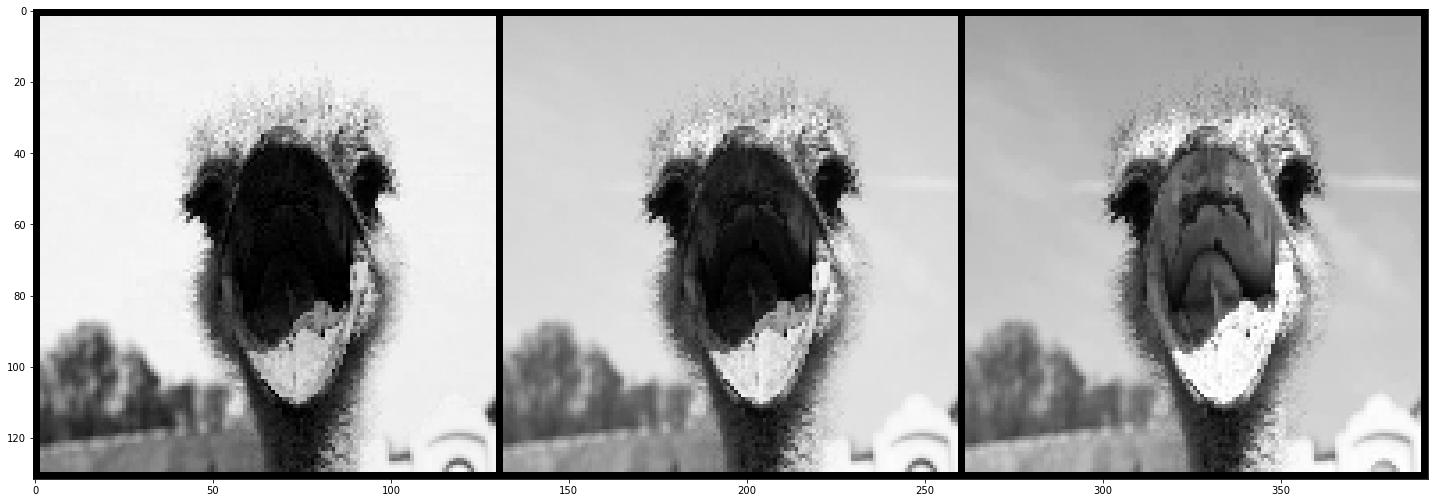

In [118]:
image = cv2.imread("struisvogel.jpg")
image = cv2.resize(image, (128, 128), interpolation = cv2.INTER_CUBIC)
image = torch.from_numpy(image).permute(2, 0, 1).type(torch.FloatTensor)
vt.show_image_channels(image)

In [404]:
class MyModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 8, kernel_size=3, stride=1, padding=1)
        self.conv2 = nn.Conv2d(8, 32, kernel_size=3, stride=1, padding=1)
        self.conv3 = nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1)
        self.fc1 = nn.Linear(16 * 16 * 64, 256)
        self.fc2 = nn.Linear(256, 128)
        self.fc3 = nn.Linear(128, 10)
        self.pool = nn.MaxPool2d(2, 2)
        self.drop = nn.Dropout(0.2)
    
    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        self.a = x
        x = self.pool(F.relu(self.conv2(x)))
        self.b = x
        x = self.pool(F.relu(self.conv3(x)))
        self.c = x
        x = x.view(x.shape[0], -1)
#         x = F.relu(self.fc1(x))
#         self.d = x
#         x = F.relu(self.fc2(x))
#         self.e = x
#         x = self.fc3(x)
        return x

model = MyModel()
model.cpu()

MyModel(
  (conv1): Conv2d(3, 8, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv2): Conv2d(8, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv3): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (fc1): Linear(in_features=16384, out_features=256, bias=True)
  (fc2): Linear(in_features=256, out_features=128, bias=True)
  (fc3): Linear(in_features=128, out_features=10, bias=True)
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (drop): Dropout(p=0.2, inplace=False)
)

In [405]:
# load model
state_dict = torch.load("ninetynine.model", map_location=torch.device('cpu'))
model.load_state_dict(state_dict)

<All keys matched successfully>

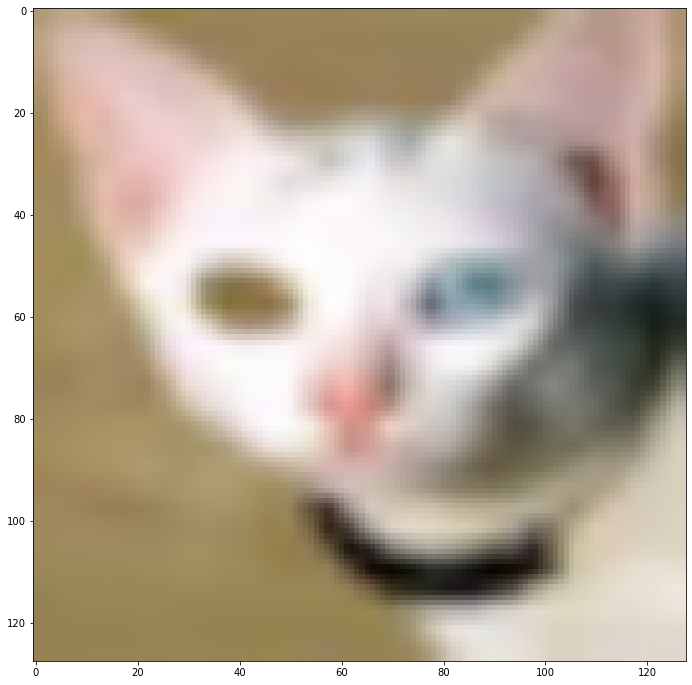

tensor([[1.7465e-07, 2.0098e-10, 2.3135e-10, 9.9999e-01, 1.7645e-13, 1.1605e-05,
         5.3736e-08, 5.3265e-11, 1.1408e-07, 9.7007e-08]],
       grad_fn=<SoftmaxBackward>)


<ipython-input-138-d6b0f2810147>:4: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  r = F.softmax(model(img.unsqueeze(0)))


In [138]:
img = images32[21]
normed = utils.normalize(img)
vt.show_image(normed)
r = F.softmax(model(img.unsqueeze(0)))
print(r)

original


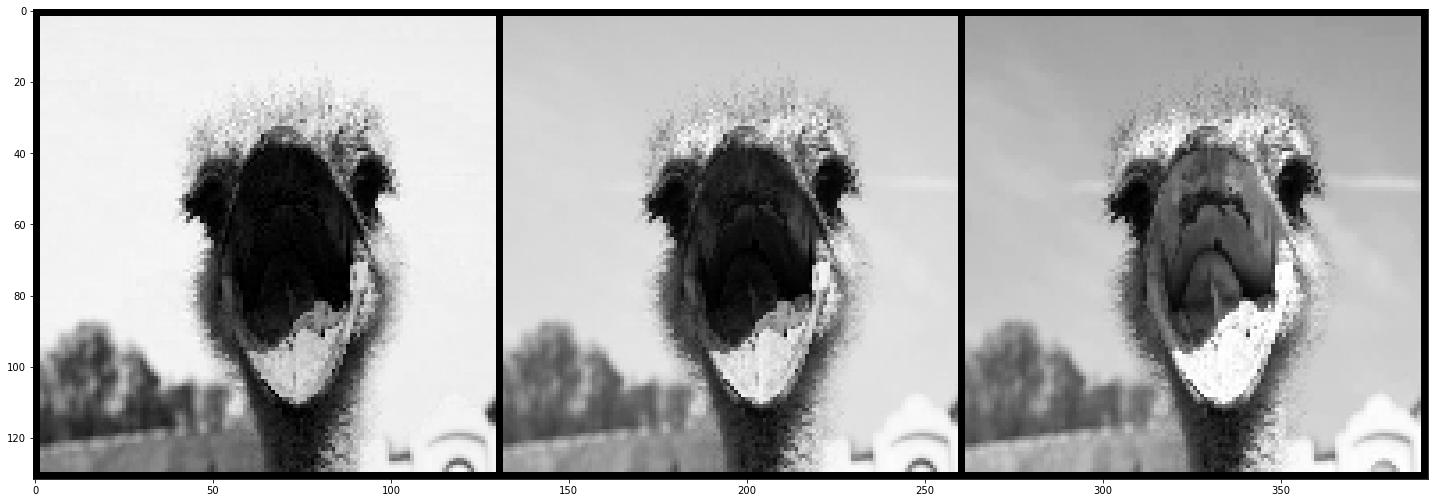

after some layer(s)


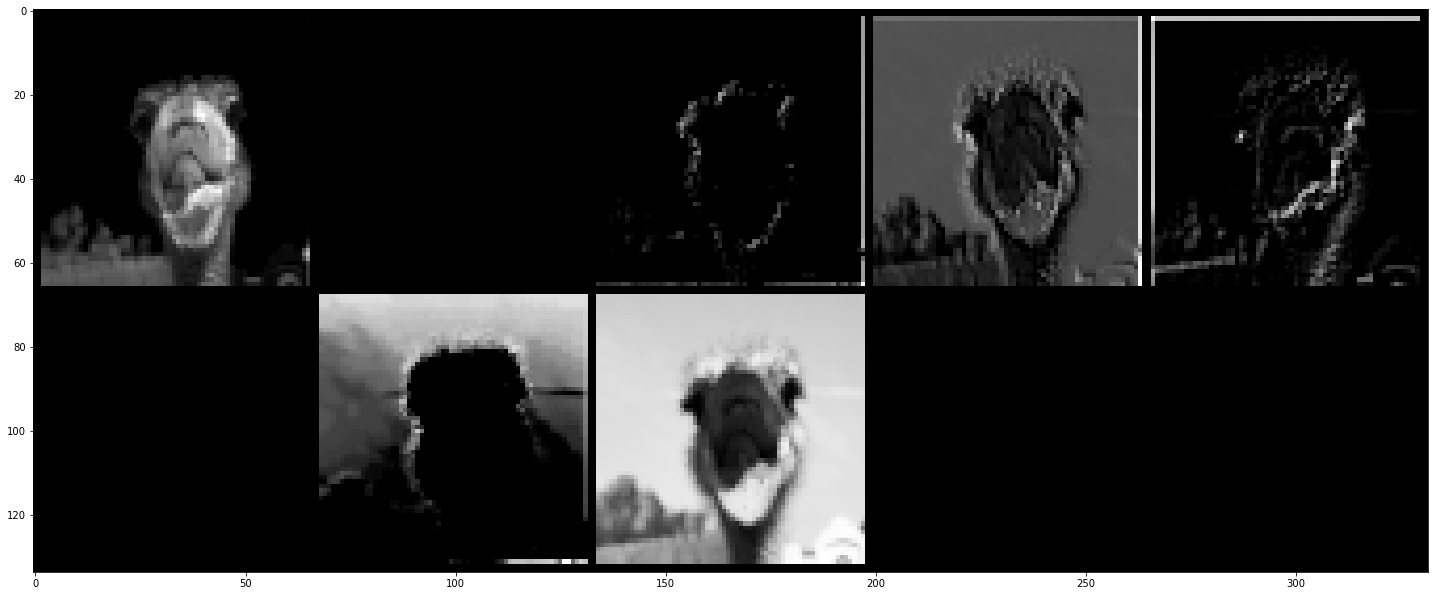

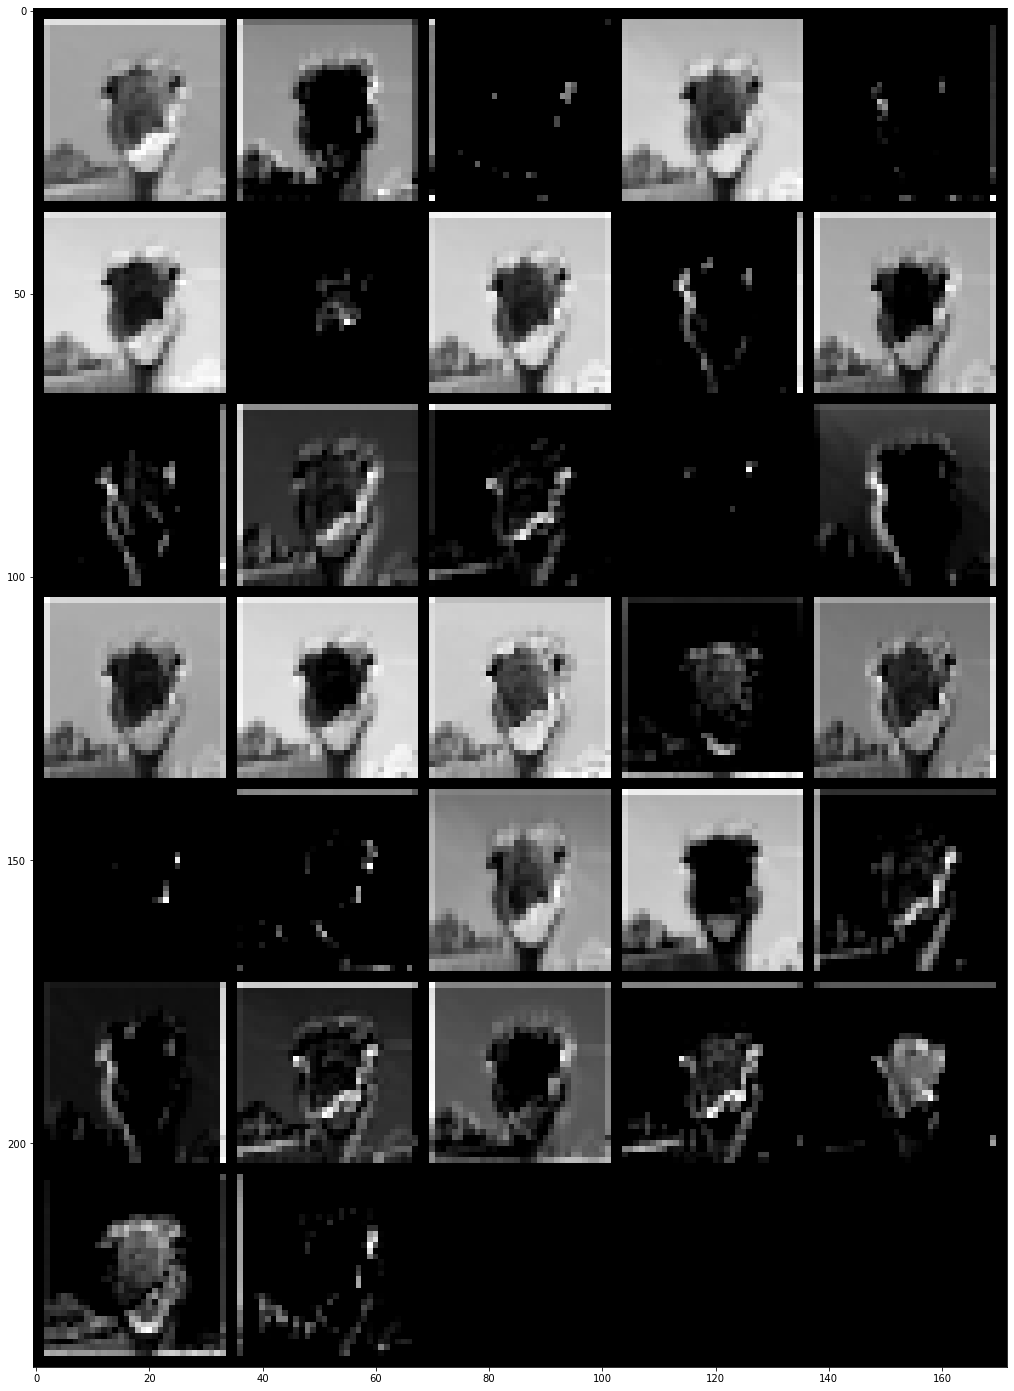

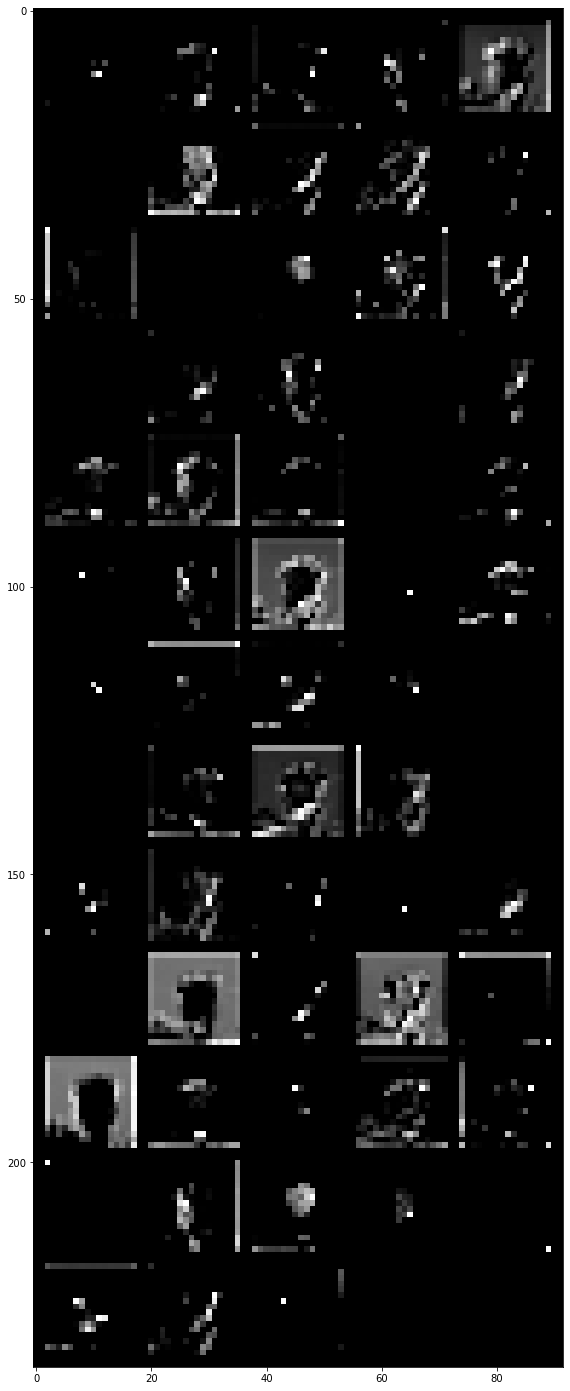

In [122]:
r = model(image.unsqueeze(0))
image_a = model.a
image_b = model.b
image_c = model.c

print("original")
vt.show_image_channels(image)
print("after some layer(s)")
vt.show_image_channels(image_a[0])
vt.show_image_channels(image_b[0])
vt.show_image_channels(image_c[0])

In [135]:
enlarged = transforms.Resize(128)(images1024)
r = model(enlarged)

In [138]:
proj_og = vt.project2d(enlarged)
proj_a = vt.project2d(model.a)
proj_b = vt.project2d(model.b)
proj_c = vt.project2d(model.c)
proj_d = vt.project2d(model.d)
proj_e = vt.project2d(model.e)
proj_r = vt.tSNE(r)

(1024, 2)
(1024, 2)


original image


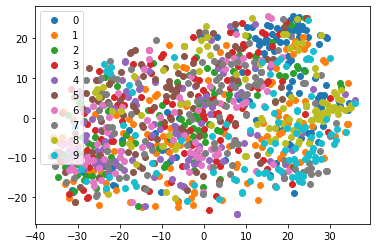

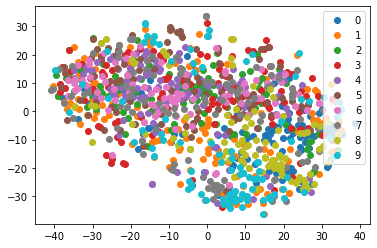

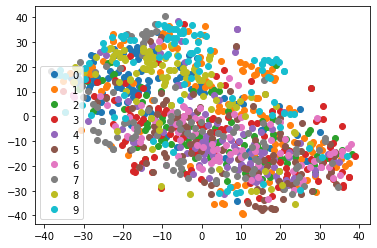

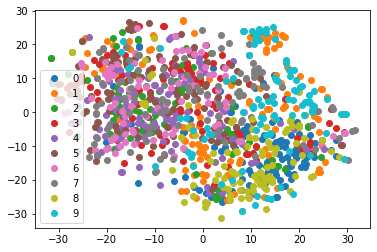

all convolutions done


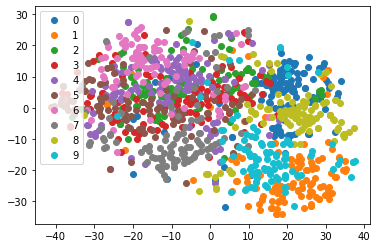

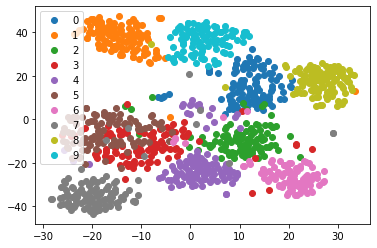

output


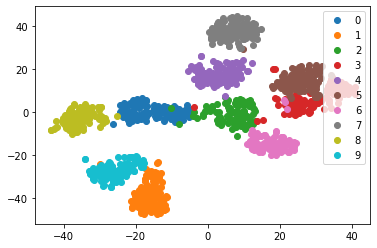

In [155]:
print("original image")
vt.plot_labeled(proj_og, labels1024)
vt.plot_labeled(proj_a, labels1024)
vt.plot_labeled(proj_b, labels1024)
vt.plot_labeled(proj_c, labels1024)
print("all convolutions done")
vt.plot_labeled(proj_d, labels1024)
vt.plot_labeled(proj_e, labels1024)
print("output")
vt.plot_labeled(proj_r, labels1024)

This will evaluate the features of channel 7 after layer 2: Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
tensor(0.1301, grad_fn=<SelectBackward>)
tensor(0.2102, grad_fn=<SelectBackward>)


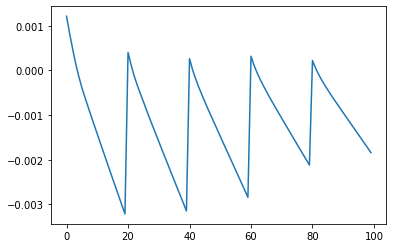

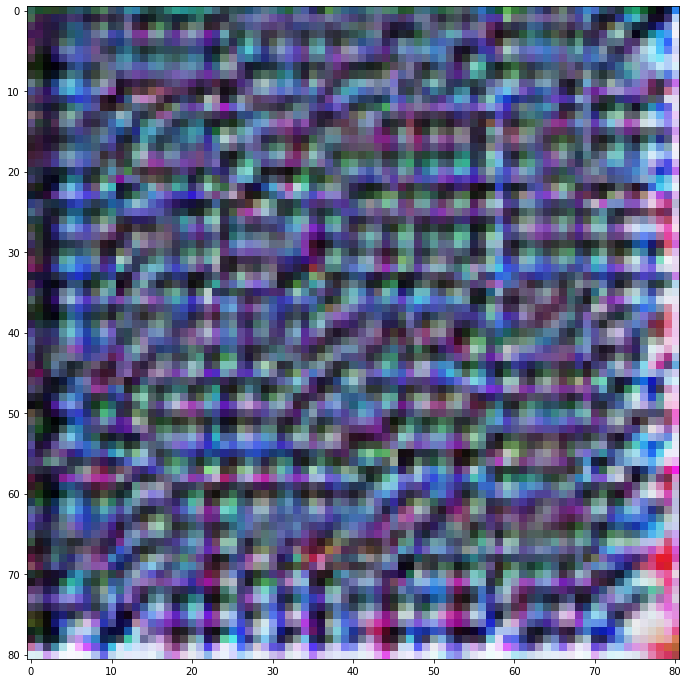

In [417]:
vt.image_that_feature_responds_to_most(model, 2, 7, (52, 52)) 

Downloading: "https://download.pytorch.org/models/vgg16-397923af.pth" to /Users/pepijnvanderklei/.cache/torch/hub/checkpoints/vgg16-397923af.pth



This will evaluate the features of channel 54 after layer 30: MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
tensor(0.4601, grad_fn=<SelectBackward>)
tensor(0.1963, grad_fn=<SelectBackward>)


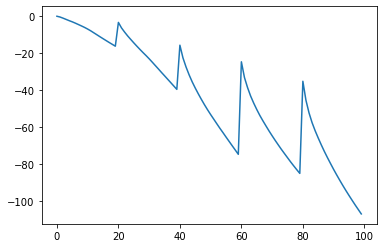

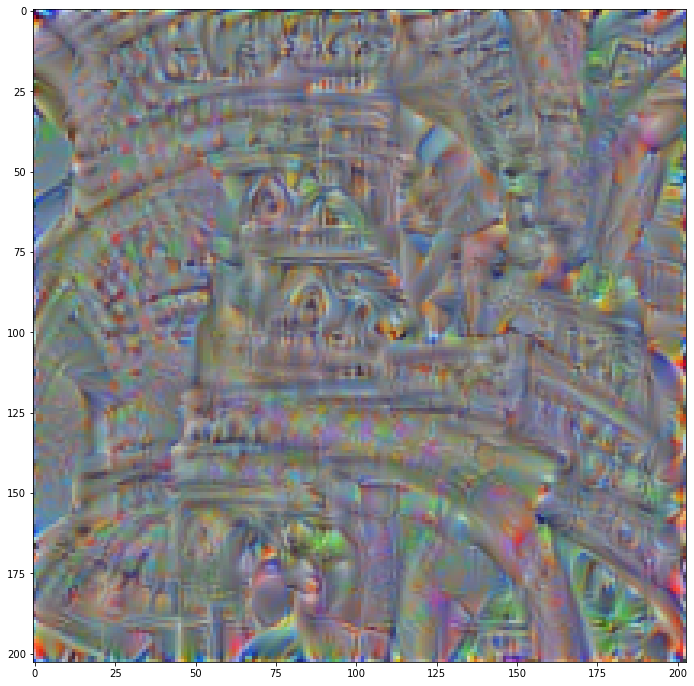

In [3]:
importlib.reload(vt)
vgg = torchvision.models.vgg16(pretrained=True).features
vt.image_that_feature_responds_to_most(vgg, 30, 54, (128, 128), lr=0.01) 